Here we integrate the two-dimensional vector Ito equation,
\begin{equation}
\mathbf{dx}=\mathbf{Ax}dt+\mathbf{BdW}
\end{equation}



In [2]:
# Integrate the Ito equation to test the LIM machinery.
# Documentation for this package is available here: https://pypi.python.org/pypi/sdeint
%matplotlib inline

import numpy as np
import sdeint
from scipy import linalg
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.figure import Figure



ImportError: No module named sdeint

In [110]:
def makeLIM(D,tau):
    ''' Constructs a LIM using the equation of Penland (1996) etc. by computing two covariance matrices at lag 0 and lag tau.
    D is a 2d matrix whos rows are indexed in time and whose columns correspond to different records.
    Tau is a unit of time and should be specified in terms of the units indexing G in time (e.g., if G is yearly, a lag of two years is specified by tau = 2)'''
    l,m = D.shape
    Dt  = D.transpose()
    c0 = np.cov(Dt)
    ctfull = np.cov(Dt[:,tau:],Dt[:,:-tau])
    # relelvant portion is one of the off-diagonal covariance submatrices
    ct = ctfull[m:,:-m]

#    L = 1/tau*linalg.logm(ct*linalg.inv(c0))
    G = np.dot(ct,linalg.inv(c0))
    return G



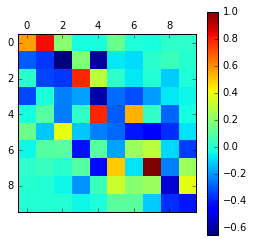

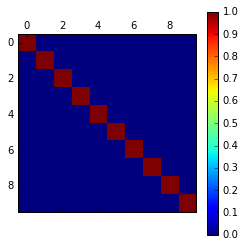

In [102]:
### Following Penland 1989

## Construct the deterministic feedback and noise covariance matrices B and Q, respectively

#B = (linalg.circulant([1,.2,.1,.01]),np.random.randn(4,4))
#B = (linalg.toeplitz([1,1,.5,.5,.2,.2,.1,.1,.01,.01])*np.random.randn(10,10))
#B = B/np.abs(B).max()

B = np.array([[  5.67799817e-01,   8.26303320e-01,   1.98857165e-01,
         -2.77166888e-02,  -2.42370260e-02,   1.41315628e-01,
         -1.68950668e-02,  -2.53694740e-02,   1.38008997e-02,
          1.59510928e-02],
       [ -2.95470643e-01,  -3.59387579e-01,  -6.52052466e-01,
          1.83357779e-01,  -6.00805160e-01,  -6.79970651e-02,
         -8.49831994e-02,   8.24424378e-03,   4.24733902e-02,
          7.33228678e-05],
       [  1.22831652e-02,  -3.33966199e-01,  -3.56486344e-01,
          7.81700203e-01,   2.97001693e-01,   1.38017228e-02,
         -6.94115239e-02,  -3.78428442e-03,  -1.14234667e-01,
         -8.83528855e-03],
       [ -3.26889551e-01,  -1.67577238e-02,  -2.34803541e-01,
         -1.81186448e-01,  -5.93719529e-01,  -2.71073330e-01,
         -3.19646737e-01,  -1.90759969e-01,  -7.05218118e-02,
         -4.44326726e-02],
       [ -2.13545803e-02,   9.81088017e-02,  -2.39603896e-01,
          2.21019862e-02,   7.85787714e-01,  -2.91991870e-01,
          5.38153095e-01,   2.57654134e-02,  -2.83301156e-01,
         -2.62838271e-02],
       [  1.40005731e-01,  -1.17268389e-01,   3.91579171e-01,
         -1.20195819e-01,  -2.36908575e-01,  -2.74568584e-01,
         -4.07365612e-01,  -4.48821379e-01,  -3.69098628e-01,
         -7.58716892e-02],
       [ -4.29340123e-02,   9.06652903e-02,   1.07866631e-01,
         -4.14292009e-01,   9.80431630e-02,  -1.79296151e-01,
          2.32221073e-01,   2.96049322e-01,  -9.10096627e-02,
         -3.44315457e-01],
       [  1.90770399e-02,   3.54019395e-02,   9.92489866e-03,
          9.10733884e-02,  -4.26864082e-01,   4.92353044e-01,
         -7.72724680e-02,   1.00000000e+00,  -2.38865645e-01,
          2.42912717e-01],
       [  1.07894620e-04,  -5.93578347e-03,  -4.26366426e-02,
         -2.02380037e-01,   4.17343159e-02,   3.32862934e-01,
          1.93484315e-01,   2.37758950e-01,  -5.28439260e-01,
          3.82954756e-01],
       [ -4.25274855e-03,  -4.92807126e-04,  -2.38328880e-03,
         -4.31945104e-02,  -1.45351883e-02,   1.06178038e-01,
          1.04153799e-01,  -1.15110774e-01,  -3.68790182e-01,
         -4.12185430e-01]])

plt.matshow(B)
plt.colorbar()
plt.show()

Q = np.eye(10)
plt.matshow(Q)
plt.colorbar()
plt.show()

In [1]:

tspan = np.linspace(0.0, 10.0, 10)
x0 = np.ones(10)*0

def f(x, t):
    return B.dot(x)

def G(x, t):
    return Q

result = sdeint.stratint(f, G, x0, tspan)
plt.plot(result[:,0],label='$x_1$');
plt.plot(result[:,1],label='$x_2$');
plt.legend();
plt.title('State trajectories from integrating Ito equation',size=14)
plt.xlabel('Time')
plt.show()

tspan
B = makeLIM(result,1)
B

NameError: name 'np' is not defined

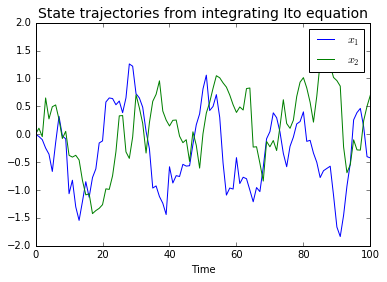

In [120]:
import numpy as np
import sdeint

A = np.array([[-0.5, -2.0],
              [ 2.0, -1.0]])

B = np.diag([1, 1]) # diagonal, so independent driving Wiener processes

tspan = np.linspace(0.0, 10.0, 101)
x0 = np.array([0.0, 0.0])

def f(x, t):
    return A.dot(x)

def G(x, t):
    return B

result = sdeint.itoint(f, G, x0, tspan)
plt.plot(result[:,0],label='$x_1$');
plt.plot(result[:,1],label='$x_2$');
plt.legend();
plt.title('State trajectories from integrating Ito equation',size=14)
plt.xlabel('Time')
plt.show()


In [122]:
### Make a LIM based on the integrated output

G = makeLIM(result,1)
G
[eag,evg] = linalg.eig(G)
[eaa,eva] = linalg.eig(A)
